In [2]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

# adjust configurations of plots

import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
df = pd.read_csv('movies.csv')

In [4]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
# check for missing data

for col in df.columns:
    missing = np.mean(df[col].isnull())
    print('{} - {}'.format(col, missing))

name - 0.0
rating - 0.010041731872717789
genre - 0.0
year - 0.0
released - 0.0002608242044861763
score - 0.0003912363067292645
votes - 0.0003912363067292645
director - 0.0
writer - 0.0003912363067292645
star - 0.00013041210224308815
country - 0.0003912363067292645
budget - 0.2831246739697444
gross - 0.02464788732394366
company - 0.002217005738132499
runtime - 0.0005216484089723526


In [6]:
print(df.isnull().sum())

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [7]:
# dealing with missing data

df['rating'].value_counts()

R            3697
PG-13        2112
PG           1252
Not Rated     283
G             153
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
TV-14           1
Approved        1
Name: rating, dtype: int64

In [8]:
df['rating'].fillna('Unrated', inplace=True)

In [9]:
print(df[df['released'].isnull()])
print(df[df['score'].isnull()])
print(df[df['votes'].isnull()])
print(df[df['writer'].isnull()])
print(df[df['star'].isnull()])
print(df[df['country'].isnull()])
print(df[df['company'].isnull()])
print(df[df['runtime'].isnull()])

                        name rating  genre  year released  score     votes  \
5728  Saw: The Final Chapter      R  Crime  2010      NaN    5.6   93000.0   
5730             The Wolfman      R  Drama  2010      NaN    5.8  104000.0   

            director               writer              star country  budget  \
5728  Kevin Greutert       Patrick Melton        Tobin Bell     NaN     NaN   
5730    Joe Johnston  Andrew Kevin Walker  Benicio Del Toro     NaN     NaN   

      gross company  runtime  
5728    NaN     NaN      NaN  
5730    NaN     NaN      NaN  
                  name   rating   genre  year  \
7661  Love by Drowning        R   Drama  2020   
7662     The Robinsons  Unrated  Action  2020   
7666      It's Just Us  Unrated   Drama  2020   

                               released  score  votes           director  \
7661   November 6, 2020 (United States)    NaN    NaN  Justin Kreinbrink   
7662  November 10, 2020 (United States)    NaN    NaN          Directors   
7666    O

In [10]:
df = df.dropna(axis = 0, subset = ['released', 'score', 'votes', 'writer', 'star', 'country', 'company', 'runtime'])

In [11]:
df['budget'].interpolate(method='linear', direction = 'forward', inplace=True)
print(df['budget'])

0       19000000.0
1        4500000.0
2       18000000.0
3        3500000.0
4        6000000.0
           ...    
7658        5000.0
7659        5000.0
7660        5000.0
7664        5000.0
7667        5000.0
Name: budget, Length: 7643, dtype: float64


In [14]:
df['gross'].fillna(int(df['gross'].mean()), inplace=True)
print(df['gross'])

0        46998772.0
1        58853106.0
2       538375067.0
3        83453539.0
4        39846344.0
           ...     
7658     78614324.0
7659        13266.0
7660     78614324.0
7664     78614324.0
7667     78614324.0
Name: gross, Length: 7643, dtype: float64


In [15]:
# sort out data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [16]:
# get rid of .0s

df['budget'] = df['budget'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [17]:
# create year column ensuring year is correct

df['stringyear'] = df['released'].str.split(" ")
df['actualyear'] = df['stringyear'].str[2]

In [18]:
df.drop(['stringyear'], axis=1, inplace=True)

In [19]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [20]:
pd.set_option('display.max_rows', None)

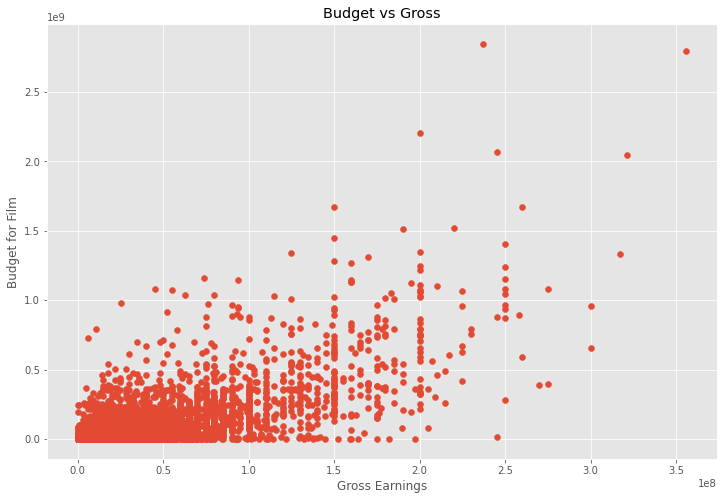

In [21]:
# find correlation in data

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

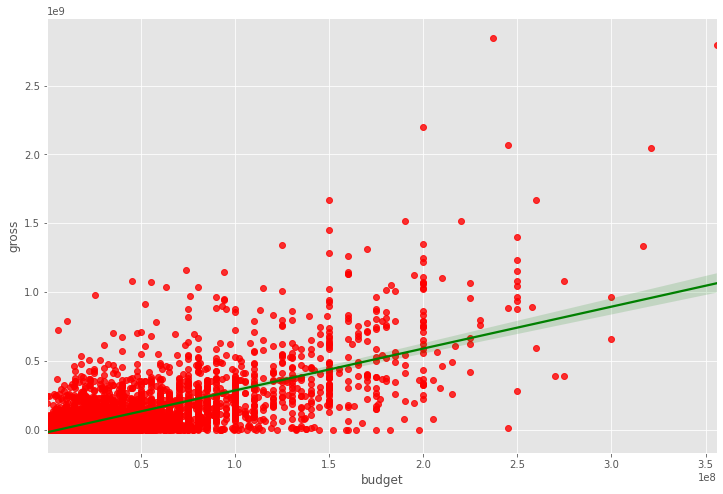

In [22]:
# perform regression on budget vs gross

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'green'})

In [23]:
df.corr(method='pearson')

# Presence of high correlation between budget and gross

,year,score,votes,budget,gross,runtime
year,1.000000,0.098278,0.223353,0.353436,0.252422,0.119789
score,0.098278,1.000000,0.409432,0.081446,0.182861,0.399965
votes,0.223353,0.409432,1.000000,0.448537,0.628735,0.308907
budget,0.353436,0.081446,0.448537,1.000000,0.702313,0.271021
gross,0.252422,0.182861,0.628735,0.702313,1.000000,0.241290
runtime,0.119789,0.399965,0.308907,0.271021,0.241290,1.000000


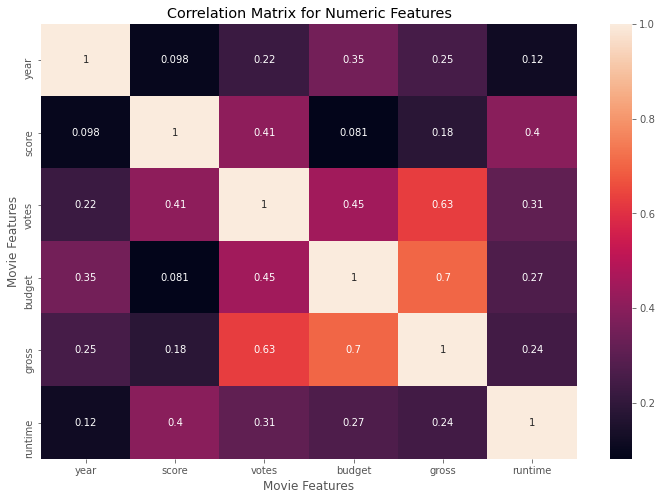

In [24]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [25]:
# aim is to include company in matrix

In [26]:
# change datatypes

df_numeric = df

for col_name in df_numeric.columns:
    if (df_numeric[col_name].dtype == 'object'):
        df_numeric[col_name] = df_numeric[col_name].astype('category')
        df_numeric[col_name] = df_numeric[col_name].cat.codes

In [27]:
df_numeric.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,actualyear
5445,532,5,0,2009,693,7.8,1100000,1153,1774,2324,55,237000000,2847246203,2246,162,31
7445,534,5,0,2019,181,8.4,903000,162,739,2231,55,356000000,2797501328,1599,181,41
3045,6873,5,6,1997,701,7.8,1100000,1153,1774,1587,55,200000000,2201647264,2246,194,19
6663,5128,5,0,2015,695,7.8,876000,1123,2541,520,55,245000000,2069521700,1533,138,37
7244,535,5,0,2018,190,8.4,897000,162,739,2231,55,321000000,2048359754,1599,149,40


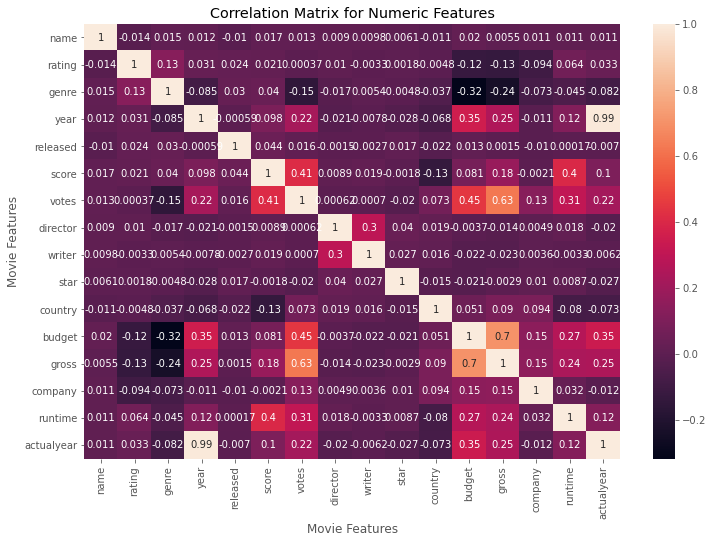

In [28]:
correlation_matrix = df_numeric.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [29]:
# unstacking

correlation_mat = df_numeric.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs.head()

name  name        1.000000
      rating     -0.014322
      genre       0.015231
      year        0.011931
      released   -0.010470
dtype: float64

In [30]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head()

budget  genre    -0.317278
genre   budget   -0.317278
        gross    -0.237932
gross   genre    -0.237932
votes   genre    -0.150201
dtype: float64

In [31]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr.head()

gross   votes         0.628735
votes   gross         0.628735
gross   budget        0.702313
budget  gross         0.702313
year    actualyear    0.991634
dtype: float64

In [32]:
# votes and gross earnings have the highest correlation